# Анализ оттока клиентов банка "Метанпром"

## Задача: 
У банка в последнее время повысился уровень оттока клиентов, необходимо составить портреты отточных клиентов, разбить их на сегменты, отчет представить менеджеру отдела маркетинга в виде презентации.
## Цель: 
 работа на удержание с потенциально отточными клиентами в соответвии с сегментами. 

## План работы:
 1. Загрузка библиотек и данных.
 2. Предобработка данных, EDA
 3. Сравнение отточных и неотточных клиентов по каждому паратметру отдельно. 
 4. Проверка гипотез
 5. Сегментация отточных клиентов
 6. Выводы

## 1. Загрузка данных

In [3]:
import pandas as pd
import plotly.express as px
from scipy import stats as st
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [4]:
# загрузка датасета
path =  "hhtps://..." #ЯндексПрактикум против публикации интеллектуальной собственности, поэтому путь к файлу я удалила
data = pd.read_csv(path)

In [5]:
# проверяем как загрузился датасет
data.head()

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1


## 2. Предобработка

### 2.1 Смотрим общую информацию о датасете

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Итак, имеем 10000 записей. 12 столбцов с данными. Не все названия столбцов записаны привычным образом - строчными буквами. Переименуем 'USERID' и 'EST_SALARY' в 'user_id' и 'salary'. Далее проанализируем пропуски в столбцах 'age' и 'balance'. Проработаем дубликаты и аномалии. Приведем типы данных к нужным. 

### 2.2 Добавляем столбцы для кодировки категориальных данных: город и пол клиентов.

In [7]:
# Создадим копии столбцов, чтобы функция кодирования не удалила оригиналы. 
data['city_copy'] = data['city']
data['gender_copy'] = data['gender']
# закодируем категориальные данные 
data = pd.get_dummies(data, columns=["city_copy", "gender_copy"])
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn,city_copy_Ростов,city_copy_Рыбинск,city_copy_Ярославль,gender_copy_Ж,gender_copy_М
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.0,Рыбинск,М,27.0,1,78144.65,1,0,1,18943.64,0,0,1,0,0,1
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0,0,0,1,0,1
9997,115639,903.0,Ярославль,М,24.0,0,NaN,2,1,1,108905.09,0,0,0,1,0,1
9998,148700,777.0,Ярославль,Ж,68.0,3,865457.97,3,0,1,86874.90,0,0,0,1,1,0


### 2.3 Меняем названия столбцов.

In [8]:
data = data.rename(columns={'USERID': 'user_id','EST_SALARY': 'salary','city_copy_Ростов':'city_rostov', 'city_copy_Рыбинск':'city_rybinsk','city_copy_Ярославль':'city_yaroslavl','gender_copy_Ж':'gender_w','gender_copy_М':'gender_m'})
data.head()

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_rostov,city_rybinsk,city_yaroslavl,gender_w,gender_m
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1,0,1,0,1,0
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0,0,1,0,1,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0,0,1,0,1,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1,0,0,1,1,0
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1,0,0,1,0,1


### 2.4 Поиск дубликатов

In [9]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено. Поищем совпадения в столбцах с данными, такими как идентификатор пользователя, доход и баланс. Такие данные довольно уникальны, и могут указывать на одного человека. В общем ищем совпадения по клиентам. 

In [10]:
data[data.duplicated(subset=['user_id','balance','salary'])]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_rostov,city_rybinsk,city_yaroslavl,gender_w,gender_m
9457,141945,929.0,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0,0,0,1,0,1


Поищем дубликаты по другим характеристикам, также характеризующие клиента, чтобы убедиться, что у нас точно нет одинаковых клиентов.

In [11]:
data[data.duplicated(subset=['user_id','age','city', 'gender'])]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_rostov,city_rybinsk,city_yaroslavl,gender_w,gender_m


Удалим найденный дубликат:

In [12]:
data = data.drop_duplicates(subset=['user_id','balance','salary']).reset_index(drop=True)

Посмотрим сколько уникальных значений в каждом столбце. 

In [13]:
data.nunique()

user_id           9927
score              348
city                 3
gender               2
age                 68
equity              10
balance           7701
products             6
credit_card          2
last_activity        2
salary            9996
churn                2
city_rostov          2
city_rybinsk         2
city_yaroslavl       2
gender_w             2
gender_m             2
dtype: int64

4 неуникальных записи по уровню дохода никак не повлияют на наше исследование, оставим их как есть. В балансе 7705 записей (это мы знаем из инфо) и 7701 уникальное значение. Значит 2 совпадения, остальное пропуски. в user-id 72 дубликата, но нет одного совпадения одновременно с другими столбцами. 72 записи от 10000 это меньше 1%. Не будем их трогать. При подсчете количества клиентов будем использовать метод count, а не nuniqie. 

### 2.5 Быстрое исследование параметров данных - EDA. 

Чтобы составить общее представление о массиве данных - исследуем их. Посмотрим распределения данных в столбцах, проанлазируем аномалии.

In [14]:
# Чтобы подемонстрировать на github графики, созданные с помощью plotly, мне придется их отрисовать в png:
import plotly.io as pio
pio.renderers.default = "png"

### Столбец  "user_id" - идентификатор клиента

count      9828.000000
mean     171807.571022
std       33727.384158
min       94561.000000
25%      142730.750000
50%      172658.000000
75%      201361.750000
max      229136.000000
Name: user_id, dtype: float64


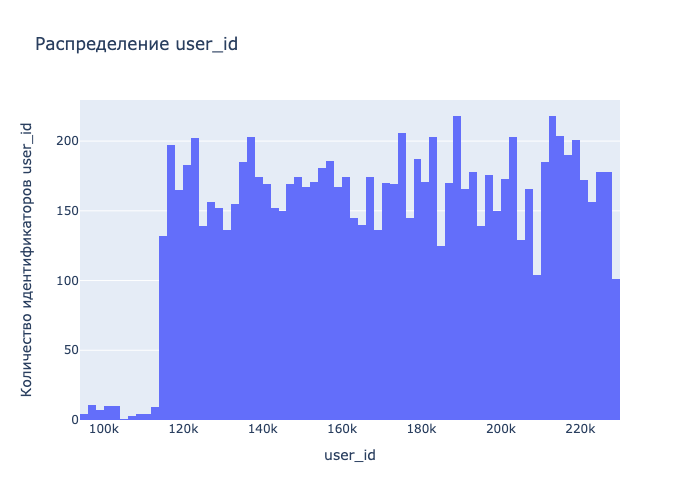

In [101]:
print(data['user_id'].describe())
fig = px.histogram(data, x="user_id", title='Распределение user_id')
fig.update_xaxes(title_text='user_id')
fig.update_yaxes(title_text='Количество идентификаторов user_id')
fig.show()

user_id распределены неравномерно. Обычно идентификатор пользователя формируется в БД автоматически и нумерация идет по заданному порядку, потому как user_id часто выступает основным ключем (primary key) в таблицах. Скорей всего наши данные собраны из разных частей БД "урывками" и не последовательны. 

### Столбец "score" - баллы скоринга клиента

count    9999.000000
mean      848.691369
std        65.446864
min       642.000000
25%       802.000000
50%       853.000000
75%       900.000000
max      1000.000000
Name: score, dtype: float64


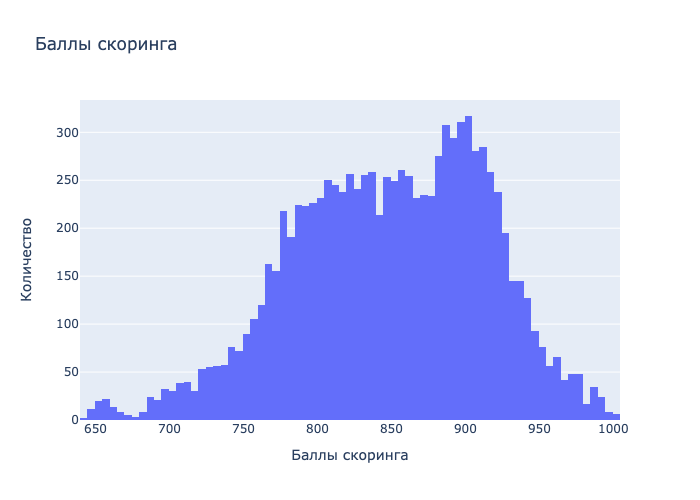

In [17]:
print(data['score'].describe())
fig = px.histogram(data, x="score", title='Баллы скоринга')
fig.update_yaxes(title_text='Количество')
fig.update_xaxes(title_text='Баллы скоринга')
fig

Распределение нормальное с выбросом в районе 880 - 930 баллов скоринга. 

### Столбец "city" - город филиала банка

count          9999
unique            3
top       Ярославль
freq           5887
Name: city, dtype: object


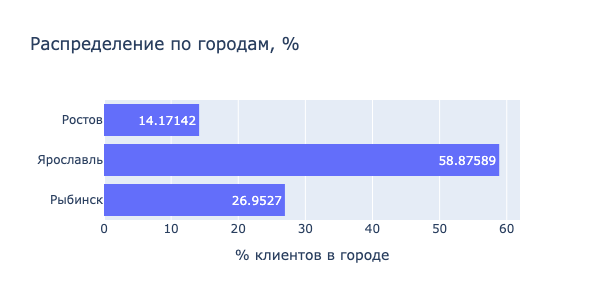

In [18]:
print(data['city'].describe())
fig = px.histogram(data, y="city", histnorm='percent',  width=600, height=300, title='Распределение по городам, %', text_auto=True)
fig.update_yaxes(title_text='')
fig.update_xaxes(title_text='% клиентов в городе')
fig.show()

Больше половины клиентов из Ярославля - 58,9%. На втором месте Рыбинск - 27%, меньше всего клиентов в датасете из Ростова - 14%

### Столбец "gender" - пол клиента

count     9999
unique       2
top          М
freq      5004
Name: gender, dtype: object


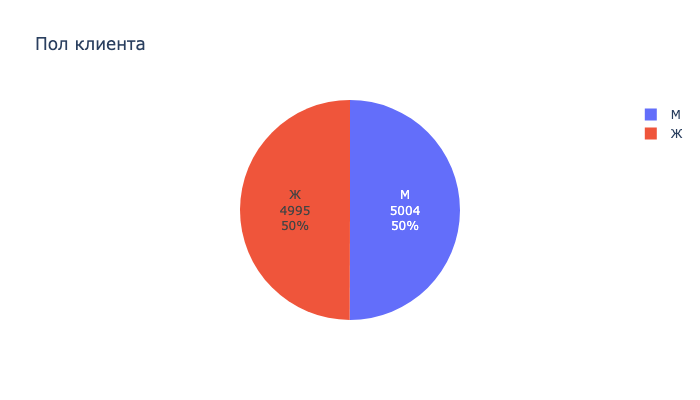

In [19]:
print(data['gender'].describe())
genders = data.groupby('gender', as_index=False).agg({'user_id':'count'})
fig = px.pie(genders, values='user_id', names="gender", height=400, title='Пол клиента')
fig.update_traces(textposition='inside', textinfo='percent+label+value')
fig.show()

Мужчин и женщин по 50%. В предоставленных данных нет сдвигов и перекосов, распределние ровное. 

### Столбец "age" - возраст клиента

count    9974.000000
mean       42.734409
std        12.179971
min        18.000000
25%        33.000000
50%        40.000000
75%        51.000000
max        86.000000
Name: age, dtype: float64


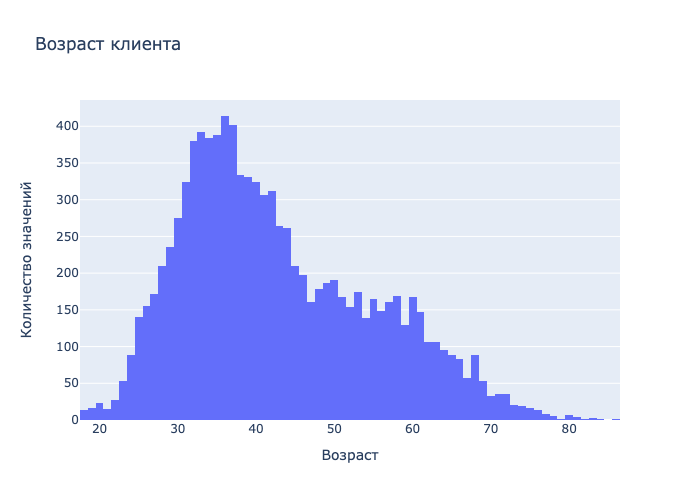

In [20]:
print(data['age'].describe())
fig = px.histogram(data, x="age", title='Возраст клиента')
fig.update_yaxes(title_text='Количество значений')
fig.update_xaxes(title_text='Возраст')
fig.show()

26 пропущенных значений в данных о возрасте (9974 из 10000). Распределение смещено влево, медиана равна 40 годам, при этом пик гистограммы приходится на возраст 36 лет. Половина клиентов банка моложе 40-ка лет. В районе 47-61 лет количество клиентов падает не значительно, на графике практически плато, далее снова снижение.  

### Столбец  "equity" - баллы собственности клиента

count    9999.000000
mean        2.627863
std         1.980761
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
max         9.000000
Name: equity, dtype: float64


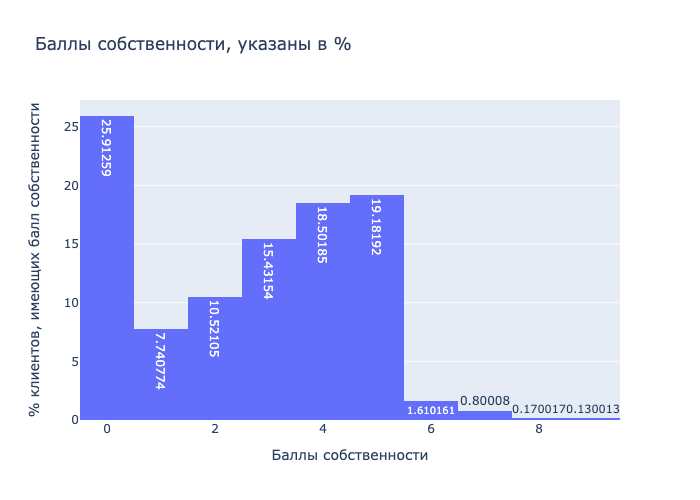

In [21]:
print(data['equity'].describe())
fig = px.histogram(data, x="equity", nbins=10, title='Баллы собственности, указаны в %', histnorm='percent', text_auto=True)
fig.update_yaxes(title_text='% клиентов, имеющих балл собственности')
fig.update_xaxes(title_text='Баллы собственности')
fig.show()

Чем выше балл - тем больше собственности у клиента. 
Четверть клиентов в датасете не имеют собственности. Далее количество клиентов растет с количеством баллов, вплоть до 5-ти. Начиная с 6 баллов число клиентов значительно снижается. Значит большинство клиентов либо не имеют собственности(скорей всего либо молодежь, либо низкие доходы) или имеют среднее количество собственности. Обеспеченных клиентов с высоким баллом - не более 3% (около 300 клиентов на 10 000).  

### Столбец  "balance" - уровень денежных средств на балансе на момент сбора данных

count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64


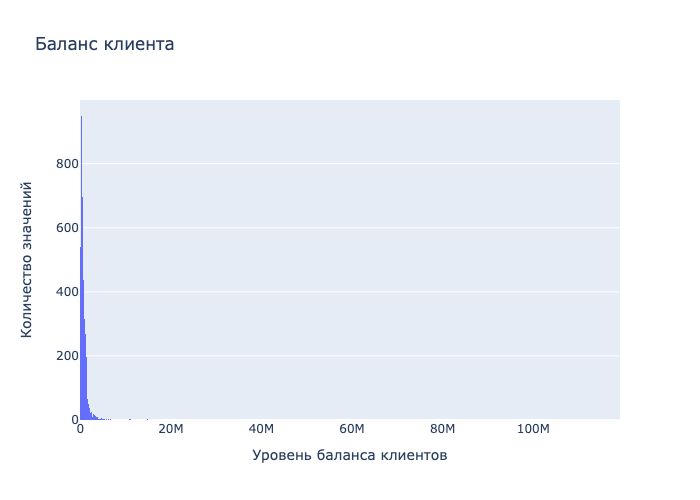

In [22]:
print(data['balance'].describe())
fig = px.histogram(data, x="balance", title='Баланс клиента')
fig.update_yaxes(title_text='Количество значений')
fig.update_xaxes(title_text='Уровень баланса клиентов')
fig.show()

Тут явно видны выбросы в значениях - потому что основные данные на графике сконцентрированы в диапазоне от 0 и примерно до 2-3 млн. Медиана нам сообщает, что 50% клиентов имеет 524 000. Q3 на уровне 980 000. Среднее равно 827 000 Тут мы видим сильное различие между медианой и средним, что подтверждает гипотезу о выбросах. стандартное отклонение больше, чем среднее - почти 2 млн.  Отфильтруем данные в этом стоблце до 2 000 000 (для более детальной информации). 

count    7.277000e+03
mean     6.136298e+05
std      4.307996e+05
min      0.000000e+00
25%      2.863875e+05
50%      4.881643e+05
75%      8.721878e+05
max      1.999799e+06
Name: balance, dtype: float64


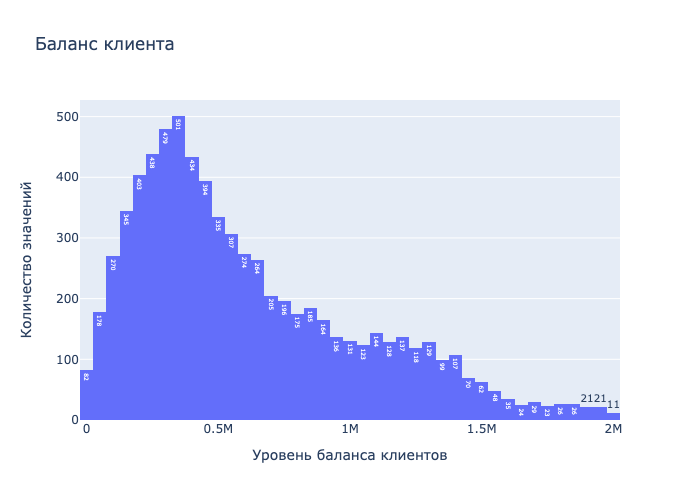

In [23]:
print(data[data['balance']<2000000]['balance'].describe())
fig = px.histogram(data[data['balance']<2000000], x="balance", title='Баланс клиента', text_auto=True)
fig.update_yaxes(title_text='Количество значений')
fig.update_xaxes(title_text='Уровень баланса клиентов')
fig.show()

В пределах от 0 до 2 млн.рублей распределение похоже на нормальное со свдигом влево и длинным "хвостом" справа. Медиана теперь равна 488 000, а среднее 613 000. 

### Столбец "products" - количество продуктов банка, которыми пользуются клиенты

count    9999.000000
mean        1.870187
std         0.792639
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: products, dtype: float64


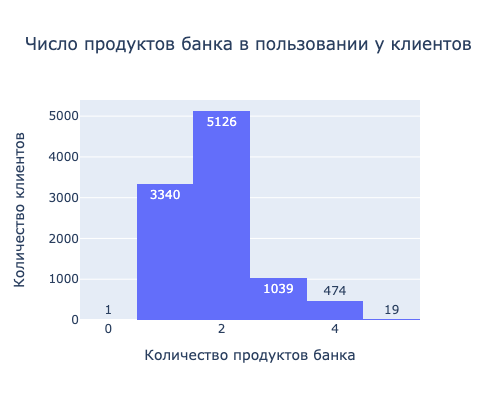

In [24]:
print(data['products'].describe())
fig = px.histogram(data, x="products", title='Число продуктов банка в пользовании у клиентов', text_auto = True,
                  width=500, height = 400)
fig.update_yaxes(title_text='Количество клиентов')
fig.update_xaxes(title_text='Количество продуктов банка')
fig.show()

Среднее 1,8 медиана - 2. 

8466(или 75%) клиентов используют 1 или 2 продукта. 493 человека пользуются больше 4 продуктами. Вполне вероятно, что они более лояльны к банку. Есть один клиент, который не пользуется продуктами банка, а значит он не клиент или ошибка сбора данных. Позже удалим его. 

### Столбец "credit_card" - индикатор использования кредитной карты клиентом. 1 - пользуется, 0 - не пользуется

count    9999.000000
mean        0.680368
std         0.466357
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: credit_card, dtype: float64


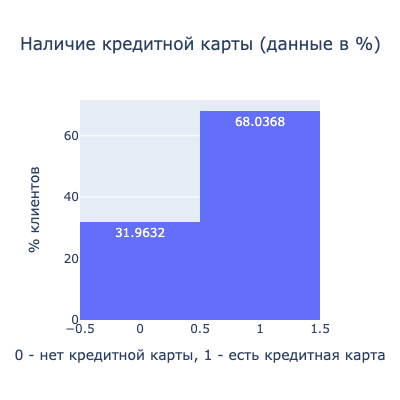

In [25]:
print(data['credit_card'].describe())
fig = px.histogram(data, x="credit_card", title='Наличие кредитной карты (данные в %)', text_auto = True,
                  width=400, height = 400, histnorm='percent')
fig.update_yaxes(title_text='% клиентов ')
fig.update_xaxes(title_text='0 - нет кредитной карты, 1 - есть кредитная карта')
fig.show()

Большинство (68%) клиентов пользуются кредитной картой. 

### Столбец "last_activity" - индикатор активности клиентов. 1 - активен, 2 - неактивен. 

count    9999.000000
mean        0.523552
std         0.499470
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: last_activity, dtype: float64


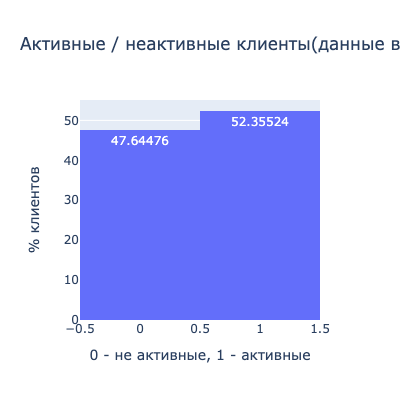

In [26]:
print(data['last_activity'].describe())
fig = px.histogram(data, x="last_activity", title='Активные / неактивные клиенты(данные в %)', text_auto = True,
                  width=400, height = 400, histnorm='percent')
fig.update_yaxes(title_text='% клиентов ')
fig.update_xaxes(title_text='0 - не активные, 1 - активные')
fig.show()

Разница между активными и неактивными составила 4,71%. Активных чуть больше. 

### Столбец "salary" - уровень дохода клиента (зарплата, % по вкладам, инвестиционные доходы и прочее)

count    9.999000e+03
mean     1.478435e+05
std      1.393758e+05
min      2.546300e+03
25%      7.525178e+04
50%      1.196547e+05
75%      1.744997e+05
max      1.395064e+06
Name: salary, dtype: float64


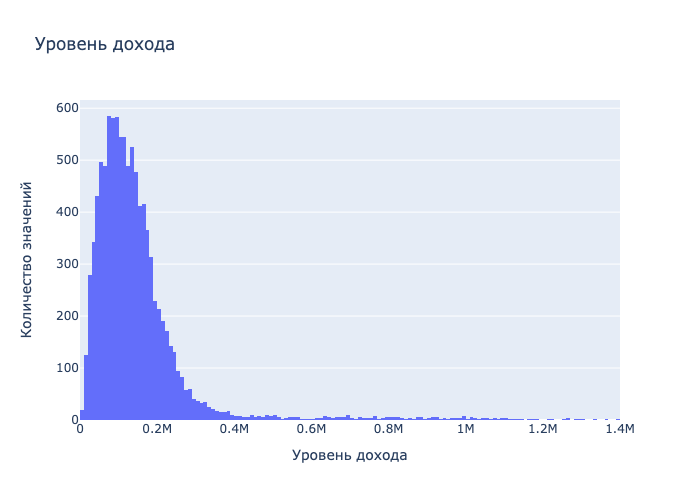

In [27]:
print(data['salary'].describe())
fig = px.histogram(data, x="salary", title='Уровень дохода')
fig.update_yaxes(title_text='Количество значений')
fig.update_xaxes(title_text='Уровень дохода')
fig.show()

График смещен влево, максиму данных сконцентрировано до 400 000. Среднее - 147 000, медиана на 119 000. Стандартное отклонение 139 000. Одиночный пик на 130-140 тыс.  Отфильтруем данные до 500 000, рассмотрим подробнее. 

count      9732.000000
mean     129150.928044
std       75349.747337
min        2546.300000
25%       74213.142500
50%      117275.340000
75%      168918.022500
max      499486.230000
Name: salary, dtype: float64


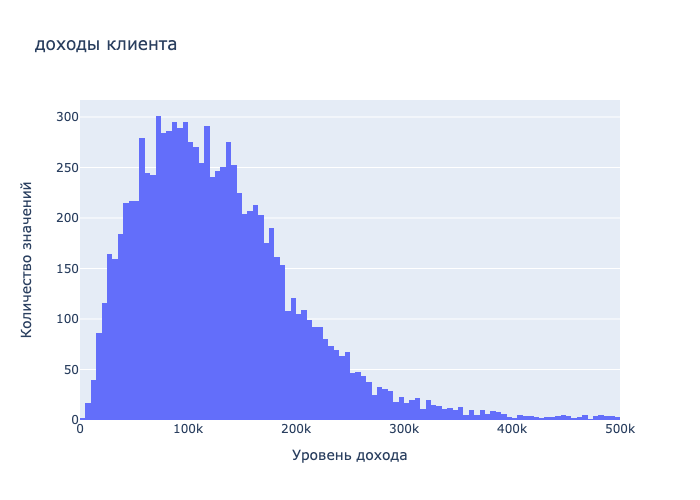

In [28]:
print(data[data['salary']<500000]['salary'].describe())
fig = px.histogram(data[data['salary']<500000], x="salary", title='доходы клиента')
fig.update_yaxes(title_text='Количество значений')
fig.update_xaxes(title_text='Уровень дохода')
fig.show()

Медиана на 117275, среднее 129 150. Есть пики на определенных уровнях, таких как 55-60тыс.р или 115-120 тыс.р, но распределение теперь выглядит более равномерным. Пик на уровне 130-140 сохранился и на этом графике. Вообще от 125 до 190 тыс распределение чуть выше, чем ожидается. 

### Столбец "churn" - индикатор оттока. 1 - клиент ушел или собирается уйти, 0 - остается с банком

count    9999.000000
mean        0.182018
std         0.385879
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: churn, dtype: float64


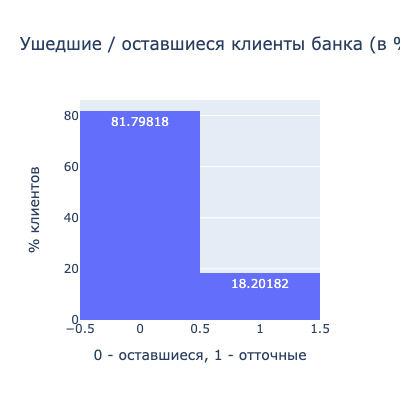

In [29]:
print(data['churn'].describe())
fig = px.histogram(data, x="churn", title='Ушедшие / оставшиеся клиенты банка (в % от общего)', text_auto = True,
                  width=400, height = 400, histnorm='percent')
fig.update_yaxes(title_text='% клиентов ')
fig.update_xaxes(title_text='0 - оставшиеся, 1 - отточные')
fig.show()

Установили средний уровень оттока - 18%.

#### __ВЫВОДЫ__ 
судя по анализу столбца user_id - данные собраны непоследовательно, возможно поэтому есть дубли в user_id. У нас больше всего клиентов из Ярославля, мужчин и женщин поровну. 50% клиентов в возрасте до 40ка лет. Средний балл скоринга - 850, но на уровне 880-930 наблюдается увеличение количества клиентов (очень интересует корреляция между скорингом и балансом клиентов, так как в этом столбце у нас больше всего пропусков, рассчитаем ее позже). 25% клиентов не имеют собственности, далее по мере увеличения количества баллов растет число клиентов, но на отметке в 6 баллов количество клиентов резко падает. Аномалии в уровне дохода и в столбце с балансом клиентов. Возможно это вип-персоны. 68% клиентов пользуются кредитной картой. Активных и неактивных почти поровну - 52,4% и 47,6% соответственно. 18% от общего количества клиентов покинули банк, будем называть их отточными - это и есть средний уровень оттока, опираясь на него будем строить наш анализ и сегментацию. 

## 2.6 Работа с пропусками
Чтобы понять какие есть взаимосвязи между столбцами датафрейма и столбцами с пропусками (age, balance) - рассчитаем коэффициент корреляции и построим heatmap для наглядности. 

####  Строим heatmap
Корреляция Пирсона не всегда может выявить все корреляции, так как ему нужны нормально распределенные данные, метод чувствителен к выбросам и находит только линейные корреляции плюс в данных много категориальных переменных, поэтому проведем проверку непараметрическим методом - рассчитаем корреляцию Спирмена. 

/var/folders/9c/69dt070x5_n15r01jnzr4j140000gn/T/ipykernel_15997/795636580.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



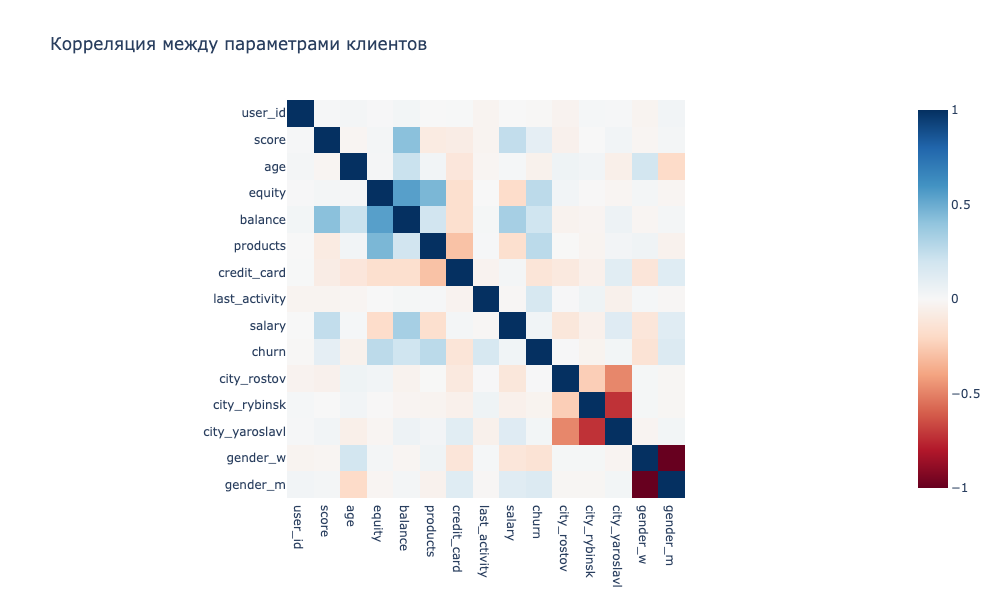

In [30]:
correl_spearman = data.corr(method = 'spearman')
fig = px.imshow(correl_spearman, color_continuous_scale='rdbu', width=1000, height=600, title="Корреляция между параметрами клиентов")
fig.show()

### Возраст. 
Нет ни одного значения с корреляцией выше 0.4-0.5. Есть слабые корреляции с  балансом и кредитной картой. Но если учесть, что пропусков в столбце 'age' всего 26 из 10 000 - мы можем смело заменить эти записи средним - они не повлияют на результаты. 

In [31]:
data['age']=data['age'].fillna(data['age'].mean())

### Баланс.

О столбце __с данными по балансу__ нельзя сказать, что нет никаих взаимосвязей с другими столбцами. На heatmap мы видим корреляцию выше среднего 0,55 между балансом и баллами собственности, 0,41 между балансом и баллами скоринга, 0,33 между балансом и уровнем дохода. Также есть небольшая корреляция между балансом и возрастом, оттоком и количеством продуктов. Таким образом баланс, score, equity и salary связаны между собой. Построим матрицу корреляций для этих трёх столбцов. 

/Users/ekaterinaantipova/opt/anaconda3/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



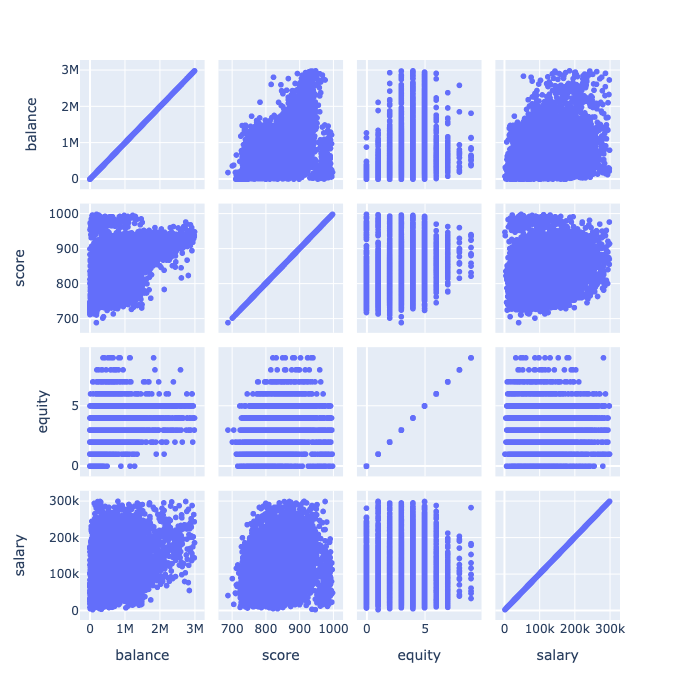

In [32]:
# Выбросы в столбце с балансом и доходом мешают корректному отображению, поэтому фильтруем датасет. 
fig = px.scatter_matrix(data[(data['balance']<3000000)&(data['salary']<300000)],
    dimensions=['balance','score','equity','salary'],
    height=700, color_continuous_scale='cividis')
fig.show()


Рассмотрим подробнее каждую взаимосвязь. 

#### Баланс vs собственность

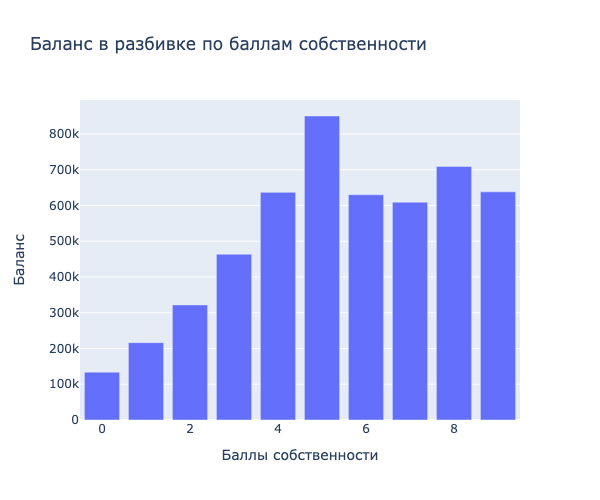

In [33]:
# ограничим данные по балансу до 20млн, чтобы при расчете среднего значения они не повлияли на график
df=data[data['balance']<20000000].pivot_table(index='equity', values='balance', aggfunc='median').reset_index()
fig = px.bar(df, x='equity', y='balance', width=600, title='Баланс в разбивке по баллам собственности',
            labels={ "equity": "Баллы собственности",
                     "balance": "Баланс"})
fig.show()

Интересная картина в связке: от 0 до 5 - уровень баланса растет вместе с уровнем собственности, с 6 до 9 устанавливается на уровне 600-640 тыс. И только при баллах собственности 8 баланс резко вырастает до 709. 

#### Баланс vs скоринг

Проверим теперь распределение среднего значения по баллам скоринга. Сначала разделим баллы на части по 50 баллов. 

In [34]:
# разобьем баллы скоринга на группы скоринга
def range_score(score):
    if score <= 699:
        range_score='600-700'
    elif  700< score <=749:
        range_score='700-750'
    elif  750< score <=799:
        range_score='750-800'
    elif  800< score <=849:
        range_score='800-850'
    elif  850< score <=899:
        range_score='850-900'
    elif  900< score <=949:
        range_score='900-950'
    else:
        range_score='от 950'  
    return range_score
        

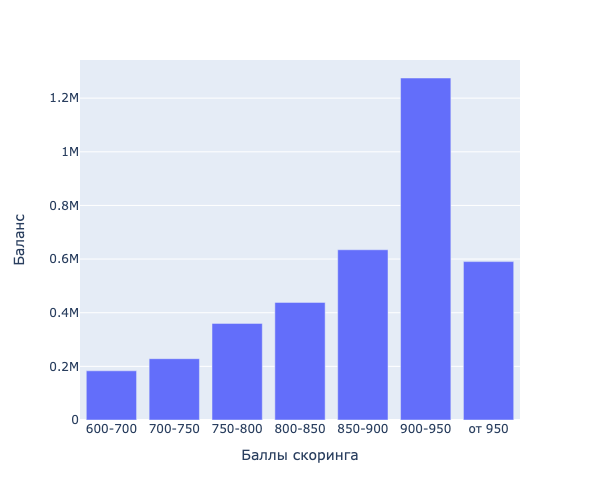

In [35]:
data['range_score']=data['score'].apply(range_score) #ранжируем датасет по группам скоринга
#рассчитаем медиану баланса по группам скоринга
df_score=data.pivot_table(index='range_score', values='balance', aggfunc='median').reset_index()
fig = px.bar(df_score, x="range_score", y="balance", width=600, labels={ "range_score": "Баллы скоринга",
                     "balance": "Баланс"})
fig.show()

Взаимосвязь баллов скоринга с уровнем баланса нелинейная. До 900 баллов уровень баланса растет плавно до 634тр, далее на 900-950 наблюдаем резкий рост до 1.27 млн.р., с 950 медаиана баланса падает до 590тр. 

#### Баланс vs собственность vs доход

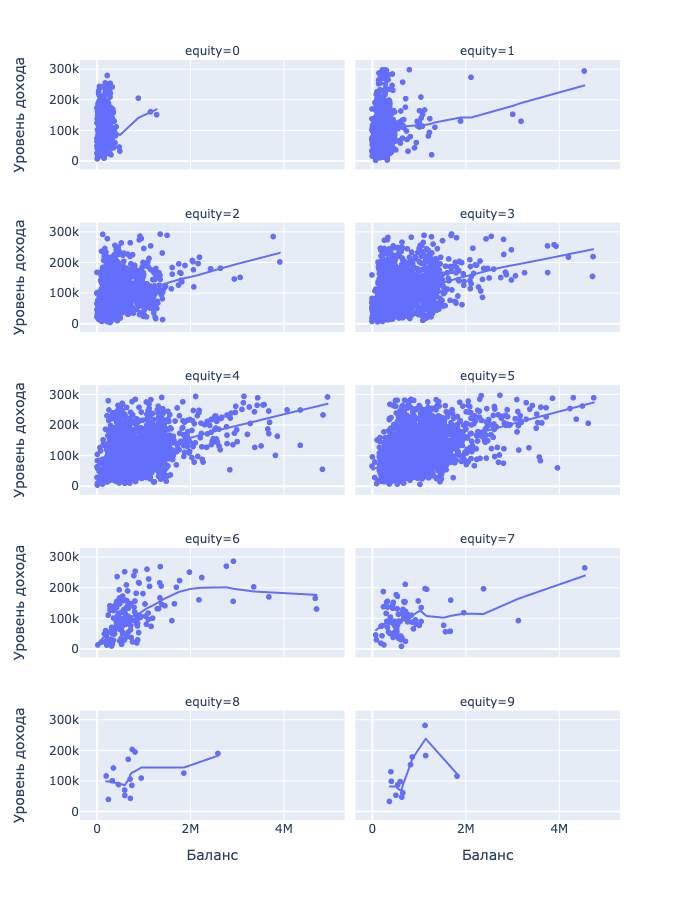

In [36]:
fig = px.scatter(data[(data['balance']<5000000)&(data['salary']<300000)],
                 x="balance", y="salary", facet_col='equity', facet_col_wrap=2,
                 trendline="lowess", height=900,labels={ "salary": "Уровень дохода", "balance": "Баланс"},
                category_orders={"equity": [0,1,2,3,4,5,6,7,8,9]})
fig.show()

Тут мы собрали доход, баланс и собственность. Тенденция такая: чем меньше собственности, тем ниже уровень баланса,  не зависимо от уровня дохода. При увеличении баллов собственности - растет и доход и баланс. При собственности >6 данных становится значительно меньше баланс концентрируется на уровне 1млн. При собственности >8 нижняя граница баланса сдвигается к 200-400 тыс.р.

#### Баланс vs собственность vs доход

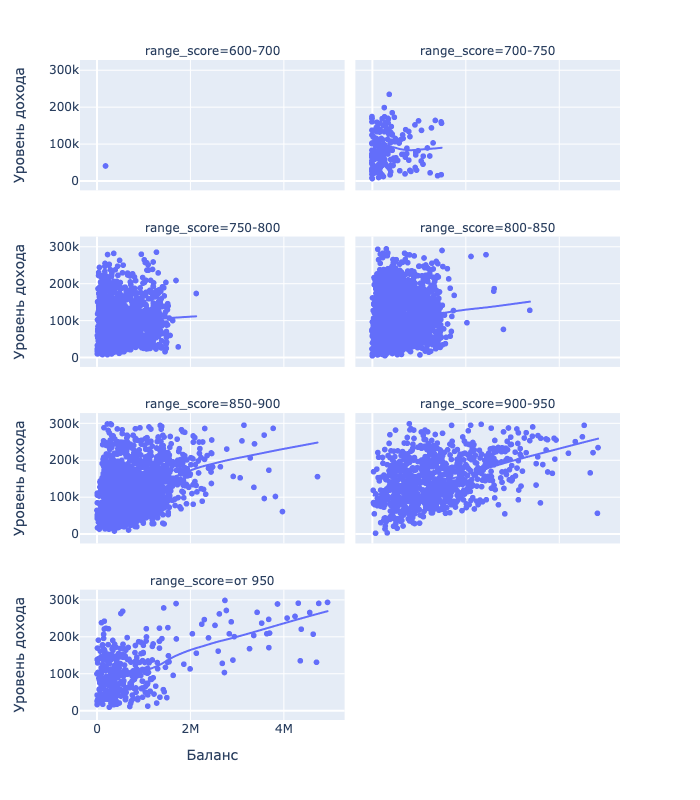

In [37]:
fig = px.scatter(data[(data['balance']<5000000)&(data['salary']<300000)],
                 x="balance", y="salary", facet_col='range_score',  facet_col_wrap=2,
                 trendline="lowess", height=800, labels={ "salary": "Уровень дохода","balance": "Баланс"},
                 category_orders={"range_score": ['600-700','700-750','750-800','800-850','850-900','900-950','от 950']},
                 )
fig.show()

Нет данных на уровне 600-700 баллов. С увеличением баллов растет и баланс. Точнее он растягивается по графику. Нельзя сказать, что при баллах скоринга 900-950 среднее значение баланса 2 млн. Так есть данные около нуля и около 5млн.

В обоих сравнениях и по скорингу и по собственности нельзя сказать, что уровень дохода сильно влияет на баланс. Во всех графиках есть при любом балансе есть любой уровень дохода. Поэтому будем заполнять пропуски на основе двух параметров - скоринга и собственности. 

#### Баланс vs equity

In [38]:
balance_isna_equity = data.groupby('equity', as_index=False).agg({'user_id':'count','balance':'count', 'salary':'count'})
balance_isna_equity['diff'] = balance_isna_equity['user_id']-balance_isna_equity['balance']
balance_isna_equity['count_missing_bal'] = ((balance_isna_equity['diff']*100)/balance_isna_equity['user_id'])
balance_isna_equity['count_missing_sal'] = (balance_isna_equity['user_id']- balance_isna_equity['salary'])
balance_isna_equity.columns=['equity','всего записей','есть записи в балансе','есть записи в доходе','пропуски в балансе','% пропущенных значений в балансе','пропуски в доходе']
balance_isna_equity.sort_values('% пропущенных значений в балансе')
balance_isna_equity

,equity,всего записей,есть записи в балансе,есть записи в доходе,пропуски в балансе,% пропущенных значений в балансе,пропуски в доходе
0,0,2591,412,2591,2179,84.098804,0
1,1,774,660,774,114,14.728682,0
2,2,1052,1052,1052,0,0.000000,0
3,3,1543,1542,1543,1,0.064809,0
4,4,1850,1850,1850,0,0.000000,0
5,5,1918,1918,1918,0,0.000000,0
6,6,161,161,161,0,0.000000,0
7,7,80,80,80,0,0.000000,0
8,8,17,17,17,0,0.000000,0
9,9,13,13,13,0,0.000000,0


84% пропущенных значений  в нулевом уровне собственности!

#### Баланс vs скоринг

In [39]:
balance_isna_score = data.groupby('range_score', as_index=False).agg({'user_id':'count','balance':'count'}).sort_values('user_id')
balance_isna_score['diff'] = balance_isna_score['user_id']-balance_isna_score['balance']
balance_isna_score['count_missing'] = ((balance_isna_score['diff']*100)/balance_isna_score['user_id'])
balance_isna_score.columns=['range_score','всего записей','количество записей в балансе','разница','% пропущенных значений']
balance_isna_score.sort_values('% пропущенных значений')


,range_score,всего записей,количество записей в балансе,разница,% пропущенных значений
3,800-850,2396,2375,21,0.876461
2,750-800,1703,1652,51,2.994715
4,850-900,2593,2100,493,19.012727
6,от 950,634,447,187,29.495268
5,900-950,2005,943,1062,52.967581
1,700-750,498,187,311,62.449799
0,600-700,170,1,169,99.411765


600-750 и 900-950 баллов скоринга имеют больше половины пропусков.

#### Матрица медианных значений баланса на пересечении скоринга и собственности. 

In [40]:
df_score_vs_equity=data.pivot_table(index='range_score', columns='equity', values='balance', aggfunc='median')
df_score_vs_equity

equity,0,1,2,3,4,5,6,7,8,9
range_score,,,,,,,,,,
600-700,NaN,NaN,NaN,183430.790,NaN,NaN,NaN,NaN,NaN,NaN
700-750,63056.130,161432.400,234826.665,351189.760,547939.615,520251.320,512448.880,NaN,NaN,NaN
750-800,117496.740,206067.480,275053.620,389993.965,501896.350,666568.820,372853.245,415083.54,NaN,NaN
800-850,168975.920,231164.160,318295.355,429316.340,507942.690,661631.845,478000.490,527128.25,480456.165,532462.15
850-900,197260.260,260881.890,360647.660,528056.890,687131.220,818302.965,657758.770,617358.97,592866.990,603594.60
900-950,114577.365,258043.460,1035053.540,1243938.155,1397985.300,1284960.880,1345219.685,822994.45,755024.210,844481.74
от 950,149468.240,150304.815,292847.340,609468.200,822122.110,1700184.590,2676869.915,1688519.01,1860187.500,NaN


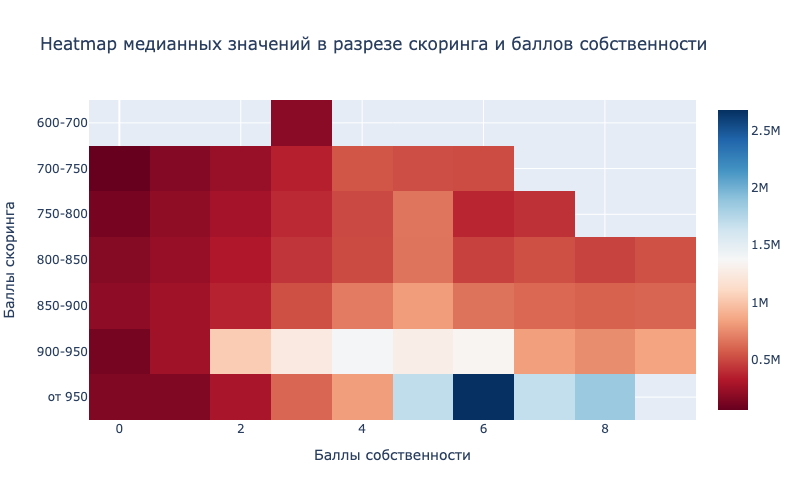

In [41]:
fig = px.imshow(df_score_vs_equity, color_continuous_scale='rdbu', width=800, height=500,
               title='Heatmap медианных значений в разрезе скоринга и баллов собственности')
fig.update_yaxes(title_text='Баллы скоринга')
fig.update_xaxes(title_text="Баллы собственности")
fig.show()

Заменим пропуски в балансе на основе расчета матрицы, кроме значений equity=0 и range_score= 600-700.

In [42]:
def replace_balance (dataset):
    for e in [0,1]:
        for score in ['700-750','750-800','800-850','850-900','900-950','от 950']:
            dataset[(dataset['equity']==e)&(dataset['range_score']==score)]=dataset[(dataset['equity']==e)&(dataset['range_score']==score)].fillna(df_score_vs_equity.loc[score,e])
    return dataset      

In [43]:
new_data = replace_balance (data)
new_data

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_rostov,city_rybinsk,city_yaroslavl,gender_w,gender_m,range_score
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.820,2,0,1,75719.14,1,0,1,0,1,0,от 950
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.330,3,1,0,86621.77,0,0,1,0,1,0,850-900
2,120722,892.0,Рыбинск,Ж,30.0,0,197260.260,1,1,1,107683.34,0,0,1,0,1,0,850-900
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.260,2,0,1,174423.53,1,0,0,1,1,0,850-900
4,157978,730.0,Ярославль,М,34.0,5,174.000,1,1,0,67353.16,1,0,0,1,0,1,700-750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,120553,814.0,Рыбинск,М,27.0,1,78144.650,1,0,1,18943.64,0,0,1,0,0,1,800-850
9995,139170,894.0,Ярославль,М,46.0,0,197260.260,1,1,0,196898.29,0,0,0,1,0,1,850-900
9996,115639,903.0,Ярославль,М,24.0,0,114577.365,2,1,1,108905.09,0,0,0,1,0,1,900-950
9997,148700,777.0,Ярославль,Ж,68.0,3,865457.970,3,0,1,86874.90,0,0,0,1,1,0,750-800


Посмотрим есть ли отточные клиенты среди тех, у кого скоринг 600-700 баллов. 

In [44]:
new_data[new_data['range_score']=='600-700'].groupby('churn').agg({'user_id':'count'})

,user_id
churn,
0,170


Так как отточных нет и количество записей 170 - 1,7% от общего числа записей - удалим их. 

In [45]:
data = new_data.drop(new_data[new_data['range_score']=='600-700'].index)

Проверим остались ли пропуски в графе с балансом. 

In [46]:
data[data['balance'].isna()]

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,salary,churn,city_rostov,city_rybinsk,city_yaroslavl,gender_w,gender_m,range_score
8957,147837,962.0,Рыбинск,Ж,79.0,3,NaN,0,0,0,25063.96,1,0,1,0,1,0,от 950


одна запись. тоже удалим ее, кстати это тот самый аномальный клиент, который не пользуется продуктами банка (в столбце "products" стоит ноль).

In [47]:
data = data.drop(data[data['balance'].isna()].index)

## 2.7 Преобразуем типы данных.

In [48]:
data['score'] = data['score'].astype('int')
data['age'] = data['age'].astype('int')

### Выводы: 
выявили пропуски в столбцах "age" и "balance". Пропуски по возрасту клиента удалены из-за их малочисленности. С пропусками по балансу проделала большая работа, проверены взаимосвязи с доходом, скорингом и собственностью. Пропуски заполнены медианными значениями в зависимости от скоринга. 

## 3. Cравнение отточных и неотточных клиентов. 

### Корреляция оттока

Рассмотрим общую картину корреляций оттока со всеми параметрами клиентов. Построим heatmap для наглядности. Рассчитаем корреляцию методом Спирмена, так как этот метод учитывает нелинейные зависимости.

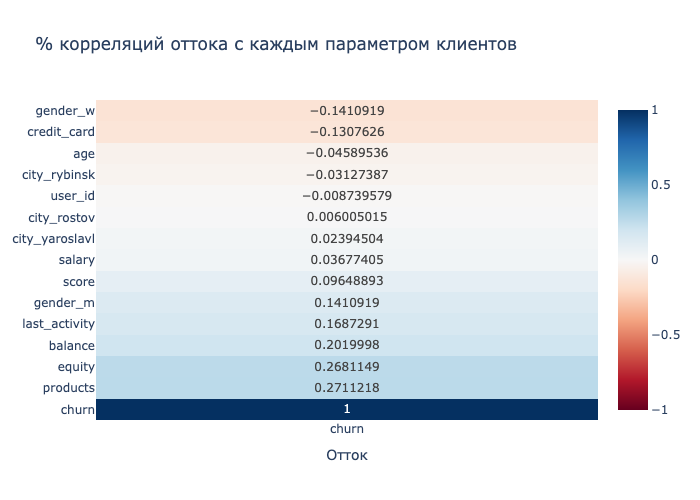

In [49]:
# считаем корреляции, сортируем по убыванию, строим тепловую карту
fig = px.imshow(correl_spearman[['churn']].sort_values('churn'), color_continuous_scale='rdbu', aspect="auto",
               color_continuous_midpoint=0, text_auto=True, title='% корреляций оттока с каждым параметром клиентов')
fig.update_xaxes(title_text="Отток")
fig.show()

__Положительная корреляция оттока выше 10% наблюдается с:__
- балансом: 29%
- продуктами: 27%
- баллами собственности: 26%
- активностью: 17%
- мужским полом: 14%

__Отрицательная корреляция оттока выше 10% наблюдается с:__
- женским полом: 14%
- наличием/отсутствием кредитной карты: 12%
Напрашивается вывод, что чем активнее клиент взаимодейтсвует с банком, тем выше отточность. 

### Рассмотрим средний уровень оттока по каждому из параметров в отдельности. 

### 3.1 Cравнение по уровню скоринга. 

In [50]:
# функция получает на входе название столбца, и создает дисплот и кривые kde, для визуального сравнения двух групп данных
def displot(column, bins=1):
    x=data[data['churn']==1][column]
    x1=data[data['churn']==0][column]
    hist_data = [x,x1]
    group_labels = ['отточные','оставшиеся'] 
    fig = ff.create_distplot(hist_data, group_labels, curve_type='kde', histnorm='probability density',  bin_size=bins)
    fig.show()
    

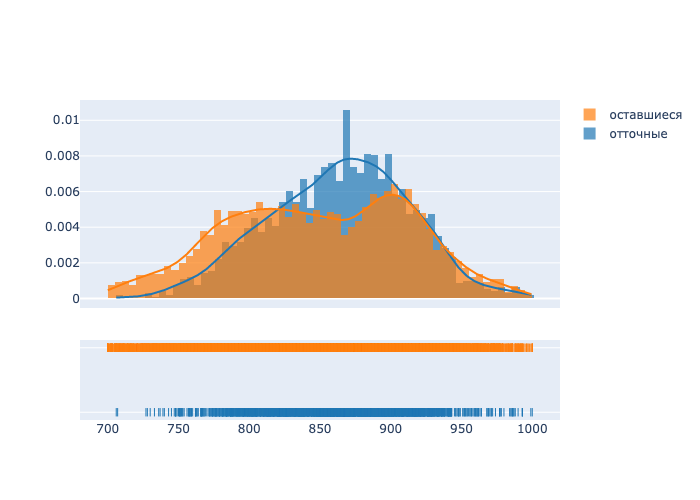

In [51]:
displot('score', bins=[5,5])


Рассчитаем уровень оттока по каждому баллу скоринга. Построим график, отметим на нем линию среднего оттока по датасету.  

In [52]:
# Функция получает столбец, формирует датасет с данными по количеству пользователей в группе и % оттока среди них 
def churning(column):
    df = data.groupby(column).agg({'user_id':'count','churn':'sum'}).reset_index()
    df['ratio'] = (df['churn'] / df['user_id'])*100 
    return df
# функция строит барплот, чтобы визуально определить размеры сегмента с уровнем оттока выше 18%.
def bar(df, column, xlabel='', ylabel='% оттока', width=900,):
    # строит столбчатую диаграмму, выделяет количество пользователей цветом
    fig = px.bar(df, x=column, y='ratio', 
                 color='user_id', color_continuous_scale='cividis',template="simple_white", width=width)
    # добавляет линию среднего уровня оттока(18%) на график 
    fig.add_shape(type="line", line_color="salmon", line_width=3, opacity=1, line_dash="dot",
                  x0=0, x1=1, xref="paper", y0=18, y1=18, yref="y")
    #подписи осей
    fig.update_xaxes(title_text=xlabel)
    fig.update_yaxes(title_text=ylabel)
    fig.show()

In [53]:
churn_score = churning('score')
churn_score.sort_values('ratio', ascending=False)

,score,user_id,churn,ratio
287,987,3,2,66.666667
299,999,2,1,50.000000
166,866,50,24,48.000000
168,868,47,21,44.680851
293,993,7,3,42.857143
...,...,...,...,...
34,734,14,0,0.000000
15,715,6,0,0.000000
265,965,6,0,0.000000
266,966,9,0,0.000000


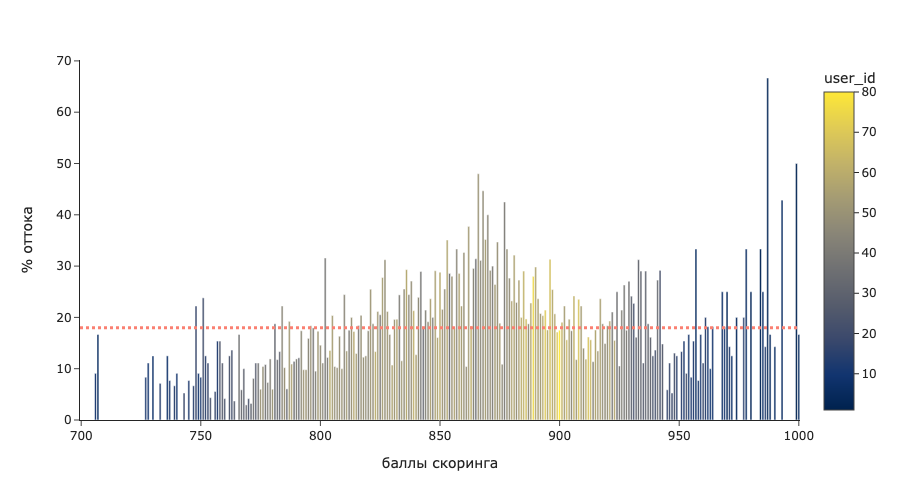

In [54]:
bar(churn_score, 'score', 'баллы скоринга', )

Концентрация клиентов в с уровнем оттока выше 18% находится в диапазоне 831 - 898 баллов скоринга. Рассчитаем размер группы и средний уровень оттока в ней.

In [55]:
churn_score.query('score >= 831 and score <=898').agg({'user_id':'sum','ratio':'mean'})

user_id    3508.000000
ratio        25.779068
dtype: float64

### 3.2 Уровни оттока по городам. 

In [56]:
churn_city = churning('city') 
churn_city

,city,user_id,churn,ratio
0,Ростов,1399,266,19.013581
1,Рыбинск,2639,436,16.521410
2,Ярославль,5790,1117,19.291883


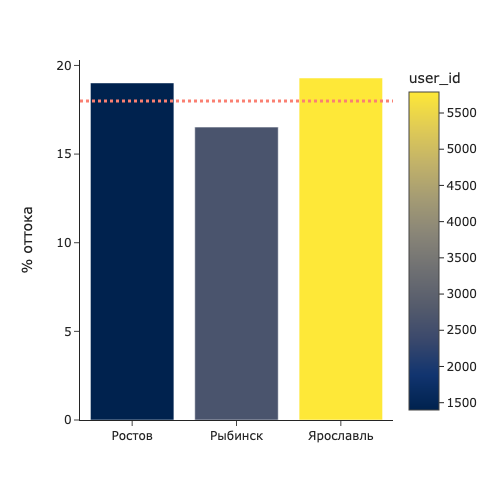

In [57]:
bar(churn_city, 'city', "", width=500)

Уровень оттока выше, чем  18% в Ярославле и Ростове. Цвета на графике говорят о том, что в Ярославле общее количество клиентов выше, чем в Ростове. В общем из трех городов, в Ярославле более 50% клиентов, а значит и уровень оттока здесь будет сильнее влиять на показатели, чем клиенты из Ростова или Рыбинска. 

### 3.3 Уровень оттока по полу. 

In [58]:
churn_gender = churning('gender')
churn_gender

,gender,user_id,churn,ratio
0,Ж,4928,636,12.905844
1,М,4900,1183,24.142857


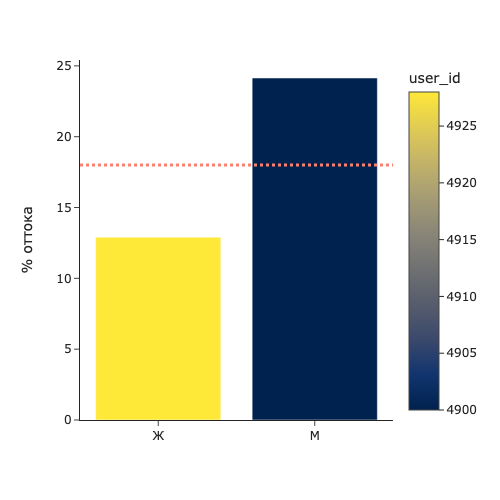

In [59]:
bar(churn_gender, 'gender',"", width=500)

Отметку в 18% оттока превысили мужчины. 

### 3.4 Уровень оттока по возрасту. 

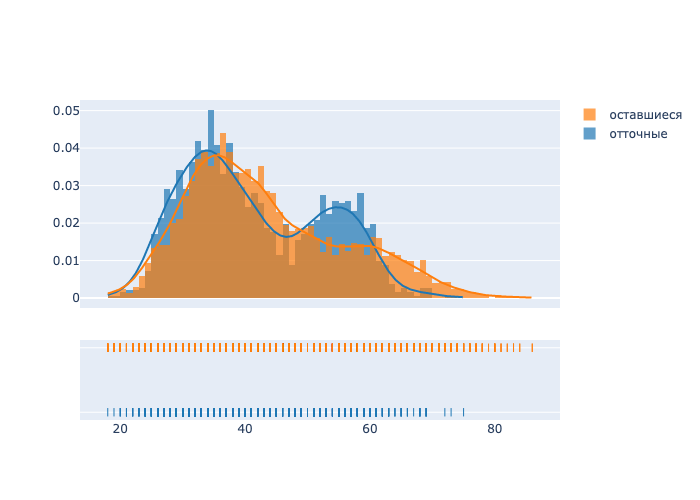

In [60]:
displot('age')

In [61]:
churned_age = churning('age')
churned_age

,age,user_id,churn,ratio
0,18,13,1,7.692308
1,19,16,1,6.250000
2,20,22,3,13.636364
3,21,15,4,26.666667
4,22,27,4,14.814815
...,...,...,...,...
63,81,3,0,0.000000
64,82,2,0,0.000000
65,83,3,0,0.000000
66,84,2,0,0.000000


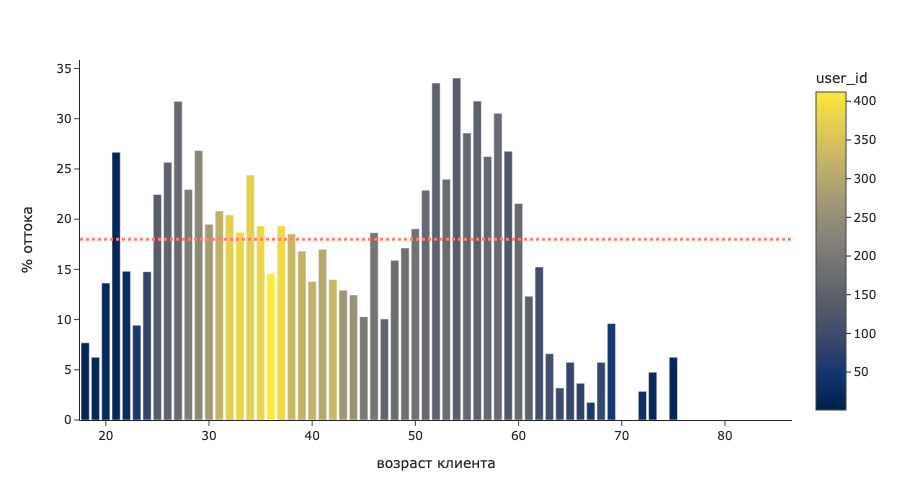

In [62]:
bar(churned_age, 'age', "возраст клиента")

Две явные группы оттока: от 25 до 35 лет и 50-60 лет. Рассчитаем численность и уровень оттока в группах.  

In [63]:
churned_age.query('age >= 25 and age <=35').agg({'user_id':'sum','ratio':'mean'})

user_id    2999.000000
ratio        22.983577
dtype: float64

In [64]:
churned_age.query('age >= 50 and age <=60').agg({'user_id':'sum','ratio':'mean'})

user_id    1743.000000
ratio        27.179678
dtype: float64

### 3.5 Уровень оттока по баллам собственности:

In [65]:
churned_equity = churning('equity')
churned_equity

,equity,user_id,churn,ratio
0,0,2430,90,3.703704
1,1,766,93,12.140992
2,2,1052,166,15.779468
3,3,1541,321,20.830629
4,4,1850,464,25.081081
5,5,1918,577,30.083420
6,6,161,58,36.024845
7,7,80,37,46.250000
8,8,17,6,35.294118
9,9,13,7,53.846154


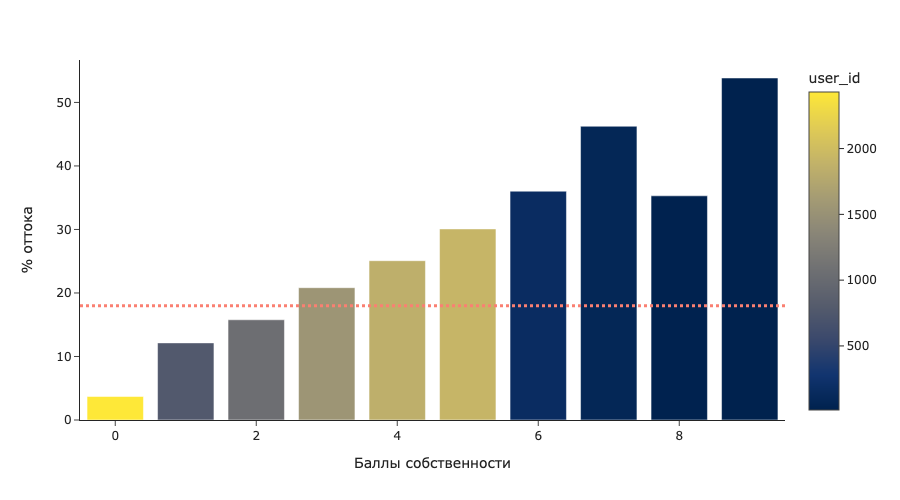

In [66]:
bar(churned_equity, 'equity', "Баллы собственности")

Отточных клиентов в разбивке по баллам собственности можно разделить на 3 группы: 
- 0-3 балла - неотточные
- 3-4 баллов отточные многочисленные (максимальный отток до 25%)
- 5-9 баллов отточные малочисленные (минимальный отток от 30%)
Рассчитаем размеры и уровни оттока у двух последних групп. 

In [67]:
churned_equity.query('equity >= 3 and equity <=4').agg({'user_id':'sum','ratio':'mean'})

user_id    3391.000000
ratio        22.955855
dtype: float64

In [68]:
churned_equity.query('equity >= 5 and equity <=9').agg({'user_id':'sum','ratio':'mean'})

user_id    2189.000000
ratio        40.299707
dtype: float64

### 3.6 Уровень оттока по балансу

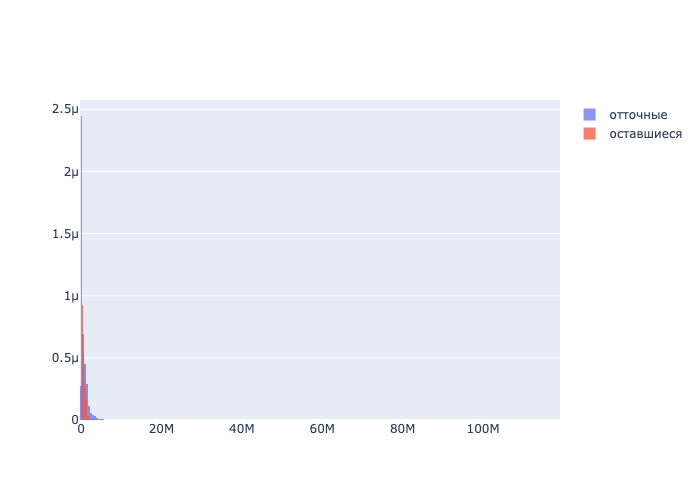

In [69]:
# строим гистограмму распредения отточных и неотточных в разбивке по балансу
x0 = data[data['churn']==1]['balance']
x1 = data[data['churn']==0]['balance']
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, histnorm='probability density', name='отточные'))
fig.add_trace(go.Histogram(x=x1, histnorm='probability density', name='оставшиеся'))
# Применяем режим наложения: перекрытие
fig.update_layout(barmode='overlay')
# Уменьшаем прозрачность
fig.update_traces(opacity=0.75)
fig.show()

На графике виден очень длинный хвост данных, а точнее ничего внятного не видно. Рассчитаем 99 процентиль по балансу, чтобы отобрать для анализа максимум данных и отбросить лишний хвост.  

In [70]:
np.percentile (data['balance'], 99)

4343651.622399985

Получилось, что 99% данных находится до суммы 4 343 651,62. Округлим до 4 350 000.  

In [71]:
# Функция построения графика с большим колическом разных значений в столбце баланса. 
def mega_displot(dataset, column, bins=20):
    x0 = dataset[dataset['churn']==1][column]
    x1 = dataset[dataset['churn']==0][column]
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=x0, histnorm='probability density', name='отточные', nbinsx=bins))
    fig.add_trace(go.Histogram(x=x1, histnorm='probability density', name='оставшиеся', nbinsx=bins))
    
    # Overlay both histograms
    fig.update_layout(barmode='overlay')
    # Reduce opacity to see both histograms
    fig.update_traces(opacity=0.75)
    fig.show()

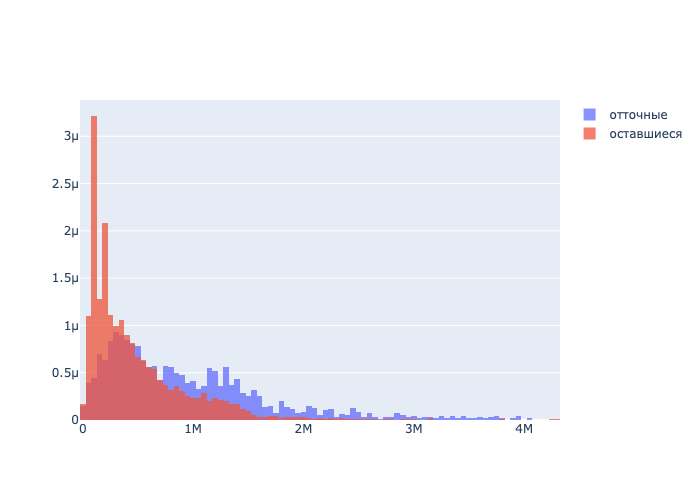

In [72]:
#первая часть датасета
churned_balance_filtered = data.query('balance < 4350000')
mega_displot(churned_balance_filtered, 'balance', 100)

На графике видно, что при балансе от 0 до 425тыс гораздо больше оставшихся клиентов. Между 425тыс и 725тыс почти одинаково, а от 725тыс отточные лидируют. рассчитаем % оттока и построим график. 

In [73]:
# разобьем датасет на интервалы 50 000 в балансе, чтобы построить столбиковую диаграмму для наглядности 
stayed=[]
churned=[]
span =[]
x=0
y=50000
interval = round(data[data['balance']<4350000]['balance'].max()/50000)
for i in range(0,interval+1): 
    try:
        stayed.append(data[(data['balance']>x) & (data['balance']<y)].groupby('churn').agg({'user_id':'count'}).reset_index()['user_id'][0])
        churned.append(data[(data['balance']>x) & (data['balance']<y)].groupby('churn').agg({'user_id':'count'}).reset_index()['user_id'][1])
        span.append('от ' + str(x) + ' до ' + str(y))
        x+=50000
        y+=50000
    except:
        stayed.append(0)
        churned.append(0)
        span.append('от ' + str(x) + ' до ' + str(y))
        x+=50000
        y+=50000
churned_balance = pd.DataFrame(list(zip(span,stayed,churned)), columns=['range','stayed','churned'])
churned_balance['user_id'] = churned_balance['stayed'] + churned_balance['churned']
churned_balance ['ratio'] = (churned_balance['churned'] / churned_balance['user_id'])*100
churned_balance  


,range,stayed,churned,user_id,ratio
0,от 0 до 50000,131,31,162,19.135802
1,от 50000 до 100000,482,32,514,6.225681
2,от 100000 до 150000,1477,66,1543,4.277382
3,от 150000 до 200000,847,52,899,5.784205
4,от 200000 до 250000,343,65,408,15.931373
...,...,...,...,...,...
82,от 4100000 до 4150000,1,0,1,0.000000
83,от 4150000 до 4200000,0,0,0,NaN
84,от 4200000 до 4250000,2,0,2,0.000000
85,от 4250000 до 4300000,1,0,1,0.000000


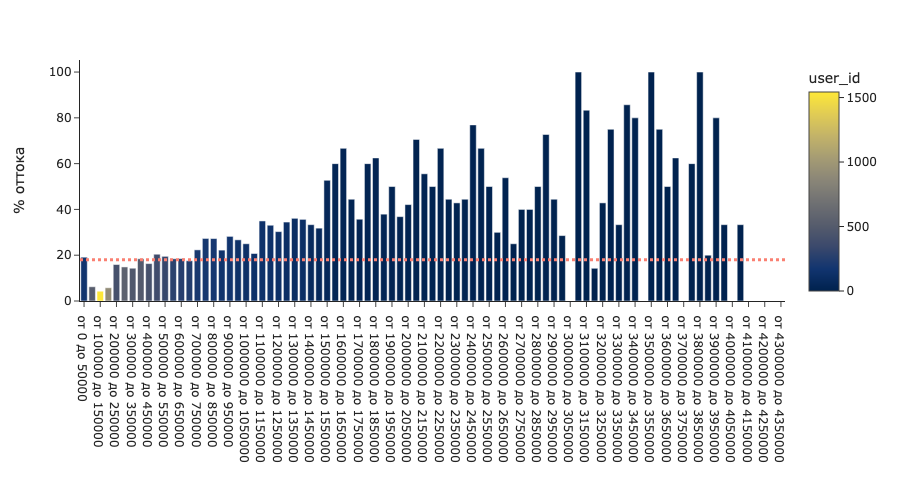

In [74]:
bar(churned_balance,'range',"")

На графике видно, что уровень оттока выше среднего при балансе от 700 000 рублей. При этом чем больше уровень баланса, тем выше уровень оттока. Посчитаем сколько клиентов в этой группе.

In [75]:
print('Количество клиентов банка, имеющих на балансе более 700 000р:', 
      churned_balance_filtered[churned_balance_filtered['balance']>=700000]['user_id'].count())
print('Из них отточных клиентов: ', churned_balance_filtered[churned_balance_filtered['balance']>=700000]['churn'].sum())
print('Процент оттока составил: ', (churned_balance_filtered[churned_balance_filtered['balance']>=700000]['churn'].sum() / churned_balance_filtered[churned_balance_filtered['balance']>=700000]['user_id'].count())*100)


Количество клиентов банка, имеющих на балансе более 700 000р: 2802
Из них отточных клиентов:  949
Процент оттока составил:  33.86866523911492


### 3.7 Уровень оттока по количеству продуктов. 

In [76]:
churned_products = churning('products')
churned_products

,products,user_id,churn,ratio
0,1,3199,235,7.346046
1,2,5099,979,19.199843
2,3,1037,297,28.640309
3,4,474,300,63.291139
4,5,19,8,42.105263


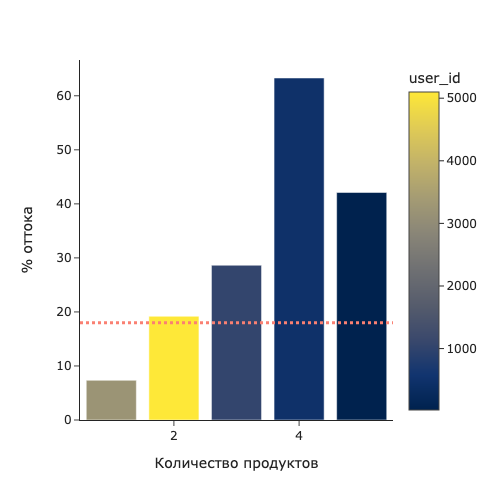

In [77]:
bar(churned_products, 'products',"Количество продуктов", width=500)

Данные можно разделить на 2 группы: 2 продукта и 3-5 продуктов. В группу с 2 продуктами входит 5099 клиентов, уровень оттока 19.2% Вторая группа состоит из 1530 клиентов, средний уровень оттока: 44,7%. 

In [78]:
churned_products.query('products>=3').agg({'user_id':'sum','ratio':'mean'})

user_id    1530.000000
ratio        44.678904
dtype: float64

### 3.8 Проверим уровень по наличию кредитной карты. 

In [79]:
churned_credit_cards = churning('credit_card')
churned_credit_cards

,credit_card,user_id,churn,ratio
0,0,3195,816,25.539906
1,1,6633,1003,15.121363


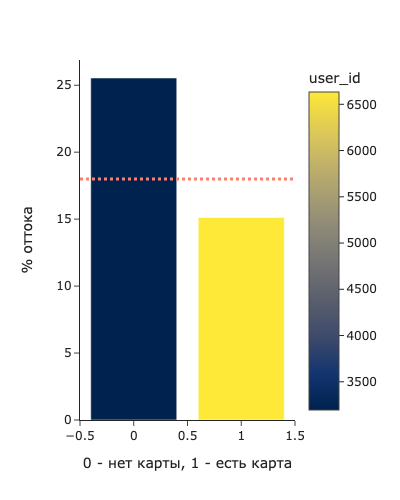

In [80]:
bar(churned_credit_cards, 'credit_card',"0 - нет карты, 1 - есть карта", width=400)

Уровень оттока 25,5% среди тех, у кого нет кредитной карты, группа состоит из 3195 клиентов. 

### 3.9 Уровень оттока у активных и неактивных. 

In [81]:
churned_active = churning('last_activity')
churned_active

,last_activity,user_id,churn,ratio
0,0,4701,541,11.508190
1,1,5127,1278,24.926858


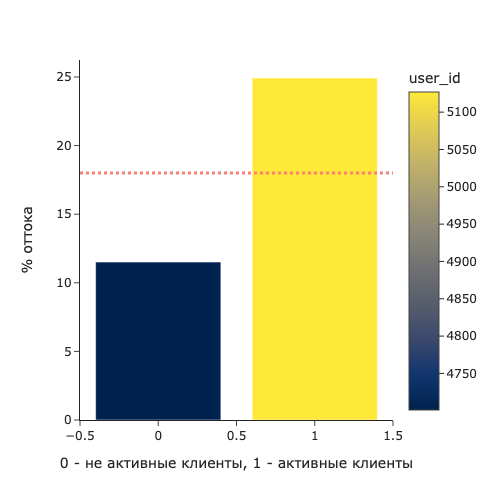

In [82]:
bar(churned_active, 'last_activity',"0 - не активные клиенты, 1 - активные клиенты", width=500)

Среди активных пользователей отток почти 25%. 5127 клиентов среди всех автивны. 

### 3.10 Уровень оттока по уровню дохода. 

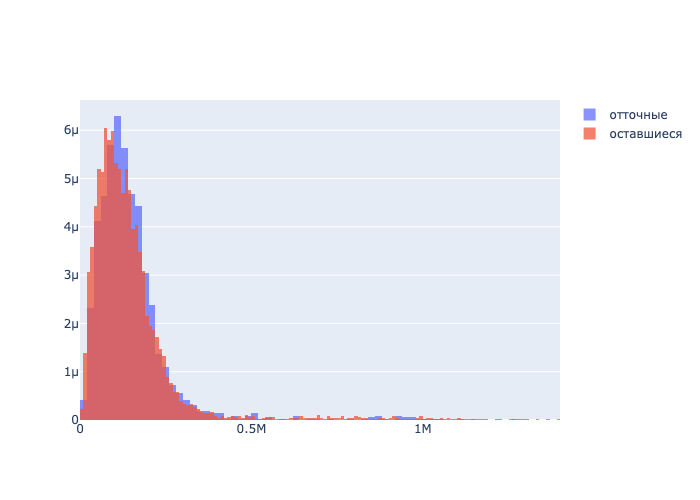

In [83]:
x0 = data[data['churn']==1]['salary']
x1 = data[data['churn']==0]['salary']
fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, histnorm='probability density', name='отточные'))
fig.add_trace(go.Histogram(x=x1, histnorm='probability density', name='оставшиеся'))
# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [84]:
stayed=[]
churned=[]
span =[]
x=0
y=20000
interval = round(data['salary'].max()/y)
for i in range(0,interval+1): 
    try:
        stayed.append(data[(data['salary']>x) & (data['salary']<y)].groupby('churn').agg({'user_id':'count'}).reset_index()['user_id'][0])
        churned.append(data[(data['salary']>x) & (data['salary']<y)].groupby('churn').agg({'user_id':'count'}).reset_index()['user_id'][1])
        span.append('от ' + str(x) + ' до ' + str(y))
        x+=20000
        y+=20000
    except:
        stayed.append(0)
        churned.append(0)
        span.append('от ' + str(x) + ' до ' + str(y))
        x+=20000
        y+=20000
churned_salary = pd.DataFrame(list(zip(span,stayed,churned)), columns=['range','stayed','churned'])
churned_salary['user_id'] = churned_salary['stayed'] + churned_salary['churned']
churned_salary['ratio'] = (churned_salary['churned'] / churned_salary['user_id'])*100
churned_salary  


,range,stayed,churned,user_id,ratio
0,от 0 до 20000,130,15,145,10.344828
1,от 20000 до 40000,532,84,616,13.636364
2,от 40000 до 60000,771,150,921,16.286645
3,от 60000 до 80000,896,169,1065,15.868545
4,от 80000 до 100000,944,207,1151,17.984361
...,...,...,...,...,...
66,от 1320000 до 1340000,4,0,4,0.000000
67,от 1340000 до 1360000,0,0,0,NaN
68,от 1360000 до 1380000,1,0,1,0.000000
69,от 1380000 до 1400000,2,0,2,0.000000


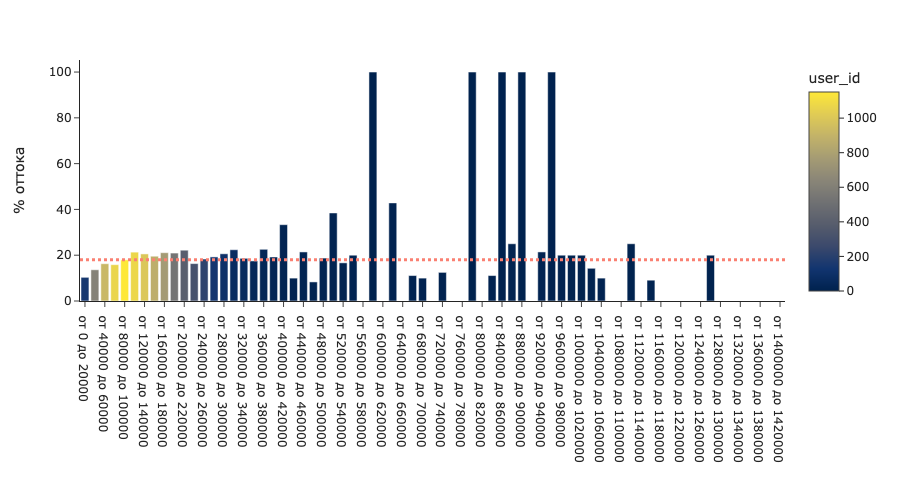

In [85]:
bar(churned_salary, 'range', "")

Самая выраженная группа отточных клиентов с доходом 100 - 420тыс. Еще можно выделить 780-1020тыс. Посмотрим численность и отток этих групп. 

In [86]:
print('Размер группы клиентов в доходом от 100000 до 420000: ', 
      data.query('salary > 100000 and salary < 420000')['user_id'].count())
print('Из них отточных клиентов: ', data.query('salary > 100000 and salary < 420000')['churn'].sum())
print('Процент оттока составил: ', (data.query('salary > 100000 and salary < 420000')['churn'].sum() / data.query('salary > 100000 and salary < 420000')['user_id'].count())*100)


Размер группы клиентов в доходом от 100000 до 420000:  5618
Из них отточных клиентов:  1149
Процент оттока составил:  20.452118191527234


In [87]:
data.query('salary > 780000 and salary < 1020000')['user_id'].count()

94

94 клиента - менее 1% от всех клиентов. Слишком мало для выделения отдельного сегмента. 

## ВЫВОДЫ 
Проведя сравнения отточных и неотточных клиентов банка мы получили группы клиентов с уровнем оттока выше среднего  в разбивке по параметрам:

- скоринг 831 - 898. Размер группы 3508, уровень оттока 25.7%
- города: Ярославль и Ростов по 19% оттока. В Ярославле 5790 клиентов, в Ростове 1399.  
- пол: мужчины - 24% оттока, а женщины - 12% оттока. Количество мужчин 4900, женщин - 4928 
- возраст 25-35, размер группы 2999 отток 23% и 50-60 размер группы 1743 отток 27%
- 3-4 балла собственности, размер группы 3391 отток 23% и 5-9 баллов, размер группы 2189 и 40% оттока
- баланс от 700 000 до 4 350 000 размер группы 2802 отток 33.8%
- группа с 2мя продуктами - 5099 клиентов, отток 19.2%, и группа "от 3 продуктов" состоит из 1530 клиентов, отток 44.7%
- не имеют кредитную карту 3195 клиентов, отток 25.5%
- активные - 5127 клиентов отток 25%, у неактивных отток 11% (больше, чем в 2 раза)
- доход от 100тыс до 420тыс. размер группы 5618, средний отток 20,5%


## 4. Проверка гипотез.

В ходе исследования данных возникли предположения. Первое: отток по столбцу "доход" не выглядит как значимый, возможно этим параметром стоит пренебречь. Проверим гипотезу, что среди отточных и неотточных клиентов уровень дохода не различается. Применим (u-критерий), сравнив отточных и не отточных в разбивке по доходу. 

Второе предположение: не видно большой разницы в оттоке между городами, проверим отток с помощью z-критерия, так как у нас три города, то есть три доли одного целого. 

### 4.1 Гипотеза 1: доход не влияет на отток

Нулевая гипотеза - статистически значимой разницы между доходом отточных и неотточных клиентов нет. Альтернативная гипотеза - уровень дохода различается. 

Сравним две выборки t-тестом. 

In [88]:
alpha = 0.05 #
results = st.ttest_ind(data[data['churn']==0]['salary'], data[data['churn']==1]['salary'], equal_var= False)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.6820789229959945
Не получилось отвергнуть нулевую гипотезу


Нет различий в доходах у отточных и оставшихся клиентов. Так как в данных по доходу есть выбросы, проверим еще и  непараметрическим тестом Уилкоксона-Манна-Уитни. 

In [89]:
alpha = 0.05 
results = st.mannwhitneyu(data[data['churn']==0]['salary'], data[data['churn']==1]['salary'])
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

p-значение:  4.138447584535154e-05
Отвергаем нулевую гипотезу: разница статистически значима


__Вывод__: есть разница в доходе у отточных и неотточных. В данном случае из-за выбросов лучше доверять результатам второго теста.  


Проверим еще равен ли средний уровень оттока по доходу 19% (как видно было на графике, когда мы расситывали уровень оттока по доходу). Применим двусторонний t-тест. 

In [90]:

alpha = .05
ratio = 19
sal = churned_salary['ratio'].fillna(0)
results = st.ttest_1samp(sal,ratio)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.8679922284485417
Не получилось отвергнуть нулевую гипотезу


__ВЫВОД:__ хотя разница в уровне доходов между отточными и неотточными есть, уровень оттока невысокий в среднем около 19%. 

### 4.2   Гипотеза 2: нет большой разницы в оттоке между городами. 

Нулевая гипотеза - различий в оттоке между городами нет. Альтернативная, разница в оттоке есть. 

In [91]:
# Напишем функцию z-теста, чтобы не повторять громоздкий код несколько раз
import math as mth

def z_test(city_1, city_2):
    alpha = 0.05  # критический уровень статистической значимости
    city1_count=data[data['city']==city_1]['user_id'].count() # всего клиентов в Ярославле
    city1_ch=data[data['city']==city_1]['churn'].sum() # отточные в Ярославле
    city2_count=data[data['city']==city_2]['user_id'].count() #всего клиентов в Ростове
    city2_ch=data[data['city']==city_2]['churn'].sum() # отточные в Ростове

    p1 = city1_ch / city1_count
    p2 = city2_ch / city2_count

    p_combined = (city1_ch + city2_ch)/(city1_count + city2_count)
    difference = p1-p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/city1_count + 1/city2_count))
    distr = st.norm(0,1)
    p_value = (1-distr.cdf(abs(z_value)))*2

    print('p-значение: ', p_value)
    if p_value<alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')
    print()    

In [92]:
z_test('Ярославль','Ростов')    

p-значение:  0.8126568487160448
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



In [93]:
z_test('Ростов','Рыбинск')

p-значение:  0.046765291112351504
Отвергаем нулевую гипотезу: между долями есть значимая разница



In [94]:
z_test('Ярославль','Рыбинск')

p-значение:  0.002345308115173639
Отвергаем нулевую гипотезу: между долями есть значимая разница



#### ВЫВОД:
ДОХОД. Есть разница в доходе у отточных и неотточных, при этом среднее значение отточных равно 19%, то есть уровень не высокий. Будем вести сегментрование с учетом доходов клиентов. 

ГОРОДА. Нам известно, что уровни оттока в Ярославле и Ростове примерно одинаковы, и чуть выше среднего, по 19%. В Рыбинске отток ниже. Z-тест показал, что нет статистически значимой разницы между Ярославлем и Ростовом, и поэтому, мы можем объединим их в одну группу для дальнейшей сегментации. То, что есть разница между Ярославлем и Рыбинском тоже не удивительно - уровень оттока и количество клиентов слишком различны. А вот, то, что нет разницы между Ростовом и Рыбинском наводит на мысли, отток не сильно различается между ними, и Ростовом и Ярославлем. А в сравнении Ярославля и Рыбинском разница становится критически важной. 

## 5. Сегментация. 

У нас получилось несколько отточных групп по размеру больше 50% датасета: Ярославль+Ростов, 2 продукта, активные, доход от 100 до 420тыс, и еще сюда же можно добавить мужчин, потому что они составляют 49% половину датасета. Отметим важную деталь почти у всех этих групп невысокий уровень оттока: от 19% до 25%. 
Самый высокий уровень оттока мы получили в других группах: 3 и более продуктов, собственность 5-9 баллов, баланс от 700тыс, возраст 50-60 лет от 44% до 27%.

Попробуем соединить их между собой "большеразмерные" и высокоотточные группы, чтобы получить подходящие сегменты. Параметры сегментов: размер до 1500 клиентов, уровень оттока выше среднего в 2 раза - не менее 36%. Единственная группа которую можно выделить без сегментации это клиенты имеющие 3 и более продуктов банка - 1530 клиентов и отток 44.7%. 

### Соберем вместе самые отточные признаки

"Баланс от 700", "собственность 5-9 баллов", и добавим "доход выше 100 000" и получим ВИП клиентов:

In [95]:
print('ВИП клиенты, количество: ', 
      data.query('balance>=700000 and equity>=5 and salary>100000 and salary<420000')['user_id'].count())
print('Процент оттока составил: ', (data.query('balance>=700000 and equity>=5 and products>=3 and salary>100000 and salary<420000')['churn'].sum() / data.query('balance>=700000 and equity>=5 and products>=3 and salary>100000')['user_id'].count())*100)


ВИП клиенты, количество:  833
Процент оттока составил:  59.2436974789916


Попробуем составить все возможные комбинации из трех параметров и выбрать наиболее подходящие параметры. 

In [96]:
list_for_cilce =['age>=25 and age <=35', 
        'salary>=100000 and salary <=420000',
        'gender=="М"', 
        'city!="Рыбинск"', 
        'balance>=700000',
        'age>=50 and age <=60',
        'equity>=3 and equity<=4',
        'equity>=5',
        'products==2',
        'products>=3',
        'score >=831 and score <=898',
        'last_activity==1',
        'credit_card==0']
list_for_name = []
list_for_count = []
list_for_ratio = []
x=1
y=1
for a in list_for_cilce:
    spisok = list_for_cilce[x:14]
    for b in spisok:
        spisok2 = spisok[y:14]
        for c in spisok2:
            query = a + ' and ' + b + ' and ' + c
            count_users = data.query(query)['user_id'].count()
            if count_users>0: 
                list_for_name.append(query)
                list_for_ratio.append((data.query(query)['churn'].sum() / count_users)*100)
                list_for_count.append(count_users)
    y=y+1        
    x=x+1       


###  5.1 Выберем группы размером от 300 клиентов и с уровнем оттока выше среднего в 3 раза. 

In [97]:
df_churned = pd.DataFrame(list(zip(list_for_name,list_for_count,list_for_ratio)), columns=['segment_name','user_id','ratio'])
pd.set_option('display.max_colwidth', None)
df_churned[(df_churned['user_id']>=300) & (df_churned['ratio']>54)].sort_values('ratio', ascending=False)


,segment_name,user_id,ratio
38,age>=25 and age <=35 and balance>=700000 and last_activity==1,391,65.984655
88,age>=25 and age <=35 and last_activity==1 and balance>=700000,391,65.984655
211,"gender==""М"" and balance>=700000 and products>=3",379,64.907652
323,balance>=700000 and products>=3 and last_activity==1,411,62.043796
166,salary>=100000 and salary <=420000 and products>=3 and balance>=700000,499,59.719439
129,salary>=100000 and salary <=420000 and balance>=700000 and products>=3,499,59.719439
188,salary>=100000 and salary <=420000 and last_activity==1 and products>=3,425,59.529412
172,salary>=100000 and salary <=420000 and products>=3 and last_activity==1,425,59.529412
213,"gender==""М"" and balance>=700000 and last_activity==1",752,58.909574
111,"salary>=100000 and salary <=420000 and gender==""М"" and products>=3",411,58.394161


### Высокоточный сегмент: 
 - активные клиенты в возрасте от 25 до 35 лет, баланс выше 700 000: размер сегмента 391 клиент, уровень оттока 66%

### 5.2  Выберем группы размером от 1000 до 1500 с уровнем оттока выше среднего в 2 раза, по трем параметрам. 

In [98]:
df_churned = pd.DataFrame(list(zip(list_for_name,list_for_count,list_for_ratio)), columns=['segment_name','user_id','ratio'])
pd.set_option('display.max_colwidth', None)
df_churned[(df_churned['user_id']>=1000) & (df_churned['ratio']>36)].sort_values('ratio', ascending=False)


,segment_name,user_id,ratio
270,"city!=""Рыбинск"" and balance>=700000 and last_activity==1",1080,51.018519
106,"salary>=100000 and salary <=420000 and gender==""М"" and balance>=700000",1025,47.707317
329,balance>=700000 and last_activity==1 and last_activity==1,1527,47.216765
298,"city!=""Рыбинск"" and score >=831 and score <=898 and last_activity==1",1192,44.127517
302,"city!=""Рыбинск"" and last_activity==1 and score >=831 and score <=898",1192,44.127517
115,"salary>=100000 and salary <=420000 and city!=""Рыбинск"" and balance>=700000",1405,42.064057
333,balance>=700000 and credit_card==0 and credit_card==0,1277,41.581832
228,"gender==""М"" and equity>=5 and equity>=5",1123,41.317898
291,"city!=""Рыбинск"" and products>=3 and products>=3",1265,39.920949
124,salary>=100000 and salary <=420000 and balance>=700000 and balance>=700000,1882,39.691817


### Крупноразмерный сегмент с оттоком выше среднего в 2 раза:
- Ярославль и Ростов, активные без кредитной карты: размер сегмента 1198 клиентов, уровень оттока 36,7%

### 5.3 Выберем группы размером от 1000 до 1500 с уровнем оттока выше среднего в 2 раза, по двум параметрам. 

In [99]:
list_for_name_2 = []
list_for_count_2 = []
list_for_ratio_2 = []
x=1
for a in list_for_cilce:
    spisok = list_for_cilce[x:14]
    for b in spisok:
            query = a + ' and ' + b
            count_users = data.query(query)['user_id'].count()
            if count_users>0: 
                list_for_name_2.append(query)
                list_for_ratio_2.append((data.query(query)['churn'].sum() / count_users)*100)
                list_for_count_2.append(count_users)       
    x=x+1     
df_churned_2 = pd.DataFrame(list(zip(list_for_name_2,list_for_count_2,list_for_ratio_2)), columns=['segment_name','user_id','ratio'])
pd.set_option('display.max_colwidth', None)
df_churned_2[(df_churned_2['user_id']>=1000) & (df_churned_2['ratio']>36)].sort_values('ratio', ascending=False)
    

,segment_name,user_id,ratio
47,balance>=700000 and last_activity==1,1527,47.216765
23,"gender==""М"" and balance>=700000",1461,44.284736
64,equity>=5 and last_activity==1,1172,43.856655
48,balance>=700000 and credit_card==0,1277,41.581832
26,"gender==""М"" and equity>=5",1123,41.317898
37,"city!=""Рыбинск"" and products>=3",1265,39.920949
13,salary>=100000 and salary <=420000 and balance>=700000,1882,39.691817
72,score >=831 and score <=898 and last_activity==1,1766,39.184598
46,balance>=700000 and score >=831 and score <=898,1194,39.112228
43,balance>=700000 and equity>=5,1303,37.452034


### Сегмент по двум параметрам, крупный, отток в 2 раза выше среднего:

- Высокий доход (от 100000 до 420000) и высокий балл собственности: размер сегмента 1203 уровень оттока 37%

## Предложения по сегментам

Проанализировав данные, мы разделили клиентов на следующие сегменты и подготовили рекомендации по ним:

__Сегмент "ВИП"__ - возможно таким клиентам можно предожить личного менеджера, чтобы он быстро решал возникающие вопросы.

__Сегмент "активные клиенты в возрасте от 25 до 35 лет, баланс выше 700 000"__ - в России этот возраст - время создания карьеры и семьи. Активное пользование продуктами означает, что клиенты лояльно относятся к банку, а высокий баланс свидетельствует о накоплениях (на крупные покупки). Может быть стоит предложить таким клиентам оформить ипотеку или кредит с льготным периодом на крупную покупку. 

__Сегмент: Ярославль и Ростов, активные без кредитной карты__ - могут заинтересоваться кредитной картой с длинным льготным периодом, возможно предложить выпуск карт с какими-то символами города Ярославля или Ростова. 

__Сегмент: Высокий доход (от 100000 до 420000) и высокий балл собственности__ - такие клиенты могут заинтересоваться инвестициями - удобное приложение, бесплатные уроки по инвестированию, удобное приложение, первый месяц без комиссии. Или еще такие клиенты много зарабатывают и много тратят - можно предложить повышенный кэшбек в зависимости от суммы трат. 


# Общий вывод:

В ходе исследования мы провели преобработку данных, заменили данные по балансу, проверили корреляции. Выяснили по каким параметрам отток клиентов выше среднего. Проверили пару гипотез и провели сегментации. В общем и целом моджно скать, что чем более клиент лоялен к банку (имеет более трех продуктов, активен) и чем больше у него средств (выскоий уровень дохода, высокий баланс, много собственности) тем выше уровень оттока. Возможно стоит провести QA-тесты, опросы/анкетирования, чтобы выяснить, что нужно изменить в сервисе банка, чтобы повысить лояльность клиаентов. 